# 이미지에서 특징 감지해서 이미지 분류하기

## 합성곱 신경망 만들기

## 말과 사람을 구별하는 CNN 만들기   


### 이미지 분류 작업
(1) ImageDataGenerator 클래스 사용해서 말/사람 구분 (확인)  
(2) image_dataset_from_directory() 함수 사용해서 말/사람 구분 (확인)  
(3) 이미지 증식    
(4) 이미지 증강     
(5) 이미지 변환   

### 사용하는 이미지 데이터  
- 라벨 없이 말과 사람 이미지를 다운받아서  
- 말은 horse 디렉터리에  
- 사람은 human 디렉터리에 저장 

### 이미지 데이터 준비 
- 1. 이미지 데이터 가져오기 
- 2. 이미지 사이즈 조절 및 색상 조절, 스케일링
- 3. 이미지 증강 및 전처리
- 4. 데이터셋 만들기  

### 이미지 전처리 방법 2가지
- (1) ImageDataGenerator 클래스 사용
- (2) image_dataset_from_directory() 함수 사용 

### (1) ImageDataGenerator 클래스 사용
- 이미지 증강 및 데이터셋 만들기 작업을 한 번에 처리 가능 
- 이미지 증식 및 이미지 변환 작업도 진행 
- image 디렉터리를 지정하면 자동으로 라벨을 생성  
  - 디렉터리의 경로를 알려주면 
    - 디렉터리와 이미지를 모니터링 한 후 
    - 디렉터리내에 들어 있는 이미지에 대해서는 동일한 라벨을 생성함 
    - ex. horse 디렉터리안의 이미지들은 horse라는 타겟값을 생성
- 특정 경로에 있는 이미지들을 데이터셋으로 만들어주는 generator를 생성  
  - 데이터셋을 생성하는 것이 아니라 generator 생성  
- flow_from_directory() 메소드를 사용해서 데이터셋 생성 
   - 이미지를 특정 경로에서 불러와서 numpy array로 만들어주는 함수
   - 폴더에 구성 그대로 데이터 처리 
   - 특정 경로에 있는 이미지들을 통해 증강된 데이터들의 batches를 생성
   - 준비된 디렉터리를 순환해서 디렉터리명으로 몇개의 클래스가 있는지 확인을 하고 
     -  해당 디렉터리명으로 클래스 생성
    - 이미지 변환 기능도 포함하고 있음
   -  image_dataset_from_directory와 유사 
- flow_from_directory(
  - directory, target_size=(256, 256), color_mode='rgb',   
  - classes=None, class_mode='categorical', batch_size=32,   
  - shuffle=True, seed=None, save_to_dir=None, save_prefix='',   
  - save_format='png', follow_links=False, subset=None, interpolation='nearest')  


### image_dataset_from_directory() 함수
- 해당 디렉토리 안의 이미지 파일들을 dataset 형식 생성  
- image_size 지정 가능하고
- validation_set도 분리 가능
- 이미지 증식  기능은 없음 


In [ ]:
#############################################################

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 이미지 데이터 준비
- 구글이 제공하는 이미지셋 다운로드 받아서 사용  
- 구글 api가 제공하는 horse-or-human.zip을 사용
- https://storage.googleapis.com/learning-datasets/horse-or-human.zip  
- 분류시 **동일 분류의 이미지는 같은 폴더에 저장** 해야 함


In [3]:
import urllib.request # api 요청 패키지
import zipfile # 압축파일 관련 라이브러리

In [4]:
# 한번 실행하면 다운 완료되므로 재실행 할 필요 없음
# 구글이 제공하는 이미지셋 활용
# url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
# file_name = "horse-or-human.zip"
# training_dir = 'horse-or-human/training/'

# 이미지셋 다운로드
# urllib.request.urlretrieve(url, file_name)

# horse-or-human.zip 파일 다운로드 되었는지 확인

('horse-or-human.zip', <http.client.HTTPMessage at 0x1ea565e9150>)

In [5]:
# 압축 해제 수행 
# zip_ref = zipfile.ZipFile(file_name, 'r') # 압축객체 생성
# zip_ref.extractall(training_dir)
# zip_ref.close()
# 폴더 열어서 이미지 확인
# training 폴더 / 그 안에 horses / humans 폴더 들어 있음
# horses 폴더 : 500개 이미지 파일
# humans 폴더 : 527개 이미지 파일 

In [55]:
training_dir = 'horse-or-human/training/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# 전체 이미지를 1/255로 스케일 조정
# 제너레이터 객체 생성 시 rescale 설정
train_datagen = ImageDataGenerator(rescale=1/255)

In [10]:
# 제너레이터 객체 사용해셔 이미지 픽셀 값 조정 
# 이미지 크기 : 300 x 300 하니까 속도가 느려서
# --> 100 x 100 크기로 설정 (환경되는 경우 300 x 300로 설정)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (100, 100), #  (300, 300),
    class_mode='binary' # 말/사람 이진 분류 # categorical, sparse 등 
)
# 말 : 500 개
# 사람 : 527 개
# 2개 클래스(레이블) : 0 (말), 1(사람)
# Found 1027 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.


In [11]:
train_generator

In [12]:
# 데이터 확인
for x_data, y_data in train_generator:
    print(x_data.shape)
    print(y_data.shape)
    print(x_data[0])
    print(y_data[:5])
    break

(32, 100, 100, 3)
(32,)
[[[0.627451   0.7490196  0.9607844 ]
  [0.5803922  0.72156864 0.93725497]
  [0.5372549  0.6862745  0.91372555]
  ...
  [0.48235297 0.64705884 0.9058824 ]
  [0.48235297 0.64705884 0.9058824 ]
  [0.48235297 0.64705884 0.9058824 ]]

 [[0.98823535 1.         1.        ]
  [0.69411767 0.79215693 0.98823535]
  [0.5764706  0.72156864 0.93725497]
  ...
  [0.48627454 0.64705884 0.9058824 ]
  [0.48235297 0.64705884 0.9058824 ]
  [0.48627454 0.64705884 0.909804  ]]

 [[1.         1.         1.        ]
  [0.80392164 0.8941177  1.        ]
  [0.7137255  0.81568635 1.        ]
  ...
  [0.4901961  0.6509804  0.909804  ]
  [0.48627454 0.6509804  0.909804  ]
  [0.48627454 0.6509804  0.909804  ]]

 ...

 [[0.8862746  0.78823537 0.7137255 ]
  [0.94117653 0.8313726  0.75294125]
  [0.9333334  0.8235295  0.7411765 ]
  ...
  [0.8352942  0.73333335 0.64705884]
  [0.8470589  0.7411765  0.6509804 ]
  [0.85098046 0.7490196  0.6627451 ]]

 [[0.86666673 0.7803922  0.7294118 ]
  [0.8588236 

### 말-사람 데이터셋을 위한 CNN 구조

### CNN 모델의 층 구성
- 층의 수가  정해져있지는 않음 
- 보통 입력층-합성곱층(원하는만큼)-flatten-밀집층-규제-밀집출력층
- 합성곱층의 필터 수는 
    - 16부터 시작해서 또는 16의 배수로 시작 뒤의 층으로 갈수로 16의 배수만큼 늘리는게 일반적
        - 16, 32, 64, 128 순으로 필터수를 결정
- 층을 변경해서 가장 적합한 모델을 만드는것이 합성곱 또는 신경망계열 알고리즘의 튜닝

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling

In [18]:
# (1) 모델 구성
# 층 구성 
# 합성곱 2개층 - 평탄화 - 신경망층 - 출력층 
# Conv2D - MaxPooling2D - Flateen() - Dense() - Dense()

# 컬러이미지, 100x100 (이미지 전처리를 300x300으로 여기서도 300x300으로)
# 필터 크기 : (3, 3)
# 첫 번째 층에서 유닛수(출력수) : 16 
# MaxPooling2D : (2,2)
# 신경망층 유닛수(출력수) : 512
# 출력층 유닛수(출력수) 

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 38416)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               19669504  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 19670465 (75.04 MB)
Trainable params: 19670465 (75.04 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [24]:
# (2) 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
# 컬러 이미지인데 해상도가 낮고 크기도 작은 이미지로 학습을 진행하고 있기 때문에
# 학습률을 줄여서 최적점을 찾음 

### 검증 데이터 준비

In [25]:
# 검증데이터 다운로드 : 1번만 실행
# validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

# validation_file_name = "validation-horse-or-human.zip"
# validation_dir = 'horse-or-human/validation/'
# urllib.request.urlretrieve(validation_url, validation_file_name)

# zip_ref = zipfile.ZipFile(validation_file_name, 'r')
# zip_ref.extractall(validation_dir)
# zip_ref.close()

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x1ea56bc73d0>)

In [26]:
validation_dir = 'horse-or-human/validation/'

In [28]:
# 검증 데이터 전처리
val_datagen = ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(100,100),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [29]:
# 데이터 확인
for x_data, y_data in val_generator:
    print(x_data.shape)
    print(y_data.shape)
    print(x_data[0])
    print(y_data[:5])
    break

(32, 100, 100, 3)
(32,)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0. 1. 0. 1. 1.]


In [30]:
# 검증 데이터 포함해서 학습
model.fit(train_generator,
         epochs=15,
         validation_data=val_generator)

Epoch 1/15


33/33 [==============================] - 12s 335ms/step - loss: 2.2147 - accuracy: 0.6339 - val_loss: 0.3238 - val_accuracy: 0.8828
Epoch 2/15
33/33 [==============================] - 6s 188ms/step - loss: 0.2240 - accuracy: 0.9221 - val_loss: 0.2979 - val_accuracy: 0.8984
Epoch 3/15
33/33 [==============================] - 6s 184ms/step - loss: 0.1552 - accuracy: 0.9474 - val_loss: 0.6452 - val_accuracy: 0.7852
Epoch 4/15
33/33 [==============================] - 6s 189ms/step - loss: 0.0841 - accuracy: 0.9737 - val_loss: 0.8356 - val_accuracy: 0.7734
Epoch 5/15
33/33 [==============================] - 7s 200ms/step - loss: 0.0447 - accuracy: 0.9883 - val_loss: 0.8822 - val_accuracy: 0.8047
Epoch 6/15
33/33 [==============================] - 6s 193ms/step - loss: 0.0409 - accuracy: 0.9825 - val_loss: 0.8558 - val_accuracy: 0.8242
Epoch 7/15
33/33 [==============================] - 6s 190ms/step - loss: 0.0171 - accuracy: 0.9981 - val_loss: 0.8563 - val_accuracy: 0.8398
Epo

### 모델 실행하기

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [47]:
# 테스트용 이미지로 모델 테스트 
# image 폴더 생성해서 4개 저장
import sys
sample_images = ['./image/test_image_{}.jpg'.format(i) for i in range(1, 4)]

In [48]:
sample_images

['./image/test_image_1.jpg',
 './image/test_image_2.jpg',
 './image/test_image_3.jpg']

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

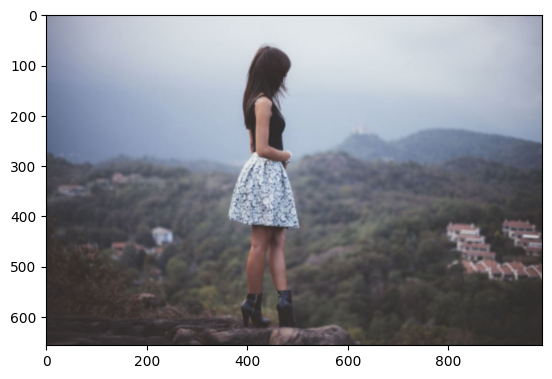

In [50]:
# 이미지 출력해서 확인
plt.imshow(mpimg.imread(sample_images[0]))
plt.show()

In [51]:
import tensorflow as tf
import numpy as np

### np.expand_dims() 함수 
- 배열의 차원 확장
- 주로 딥러닝에서 다차원 배열 다룰 때 사용
- 특히 텐석의 차원을 조정할 때 자주 사용
- np.expand_dims(arr, axis)
  - arr :차원을 확장할 배열
  - axis :새로 추가될 차원의 위치
      - 정수 또는 튜플 형태로 지정
      - 디폴트 : 0 (첫 번째 차원, 즉 인덱스 0 앞에 새로운 차원을 추가하겠다는 의미)   

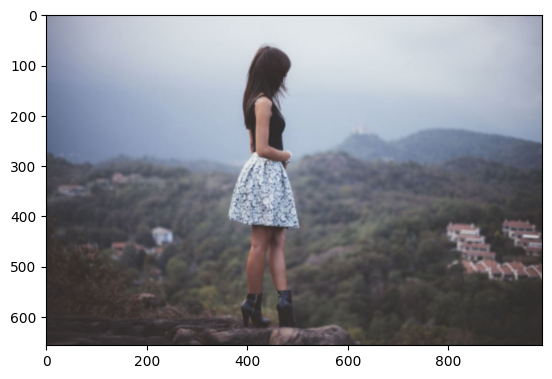

1/1 [==============================] - 0s 20ms/step
[[1.]]
모델 출력 :  1.0
./image/test_image_1.jpg는 사람입니다.


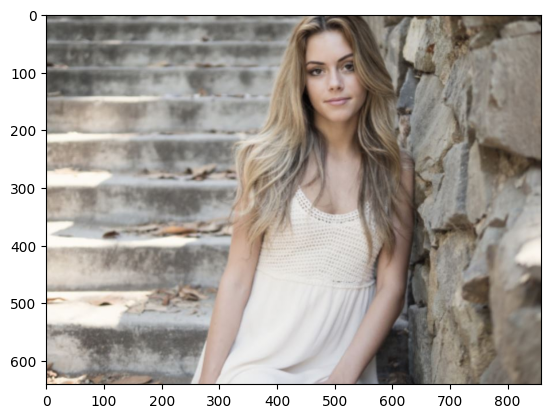

1/1 [==============================] - 0s 21ms/step
[[0.]]
모델 출력 :  0.0
./image/test_image_2.jpg는 말입니다.


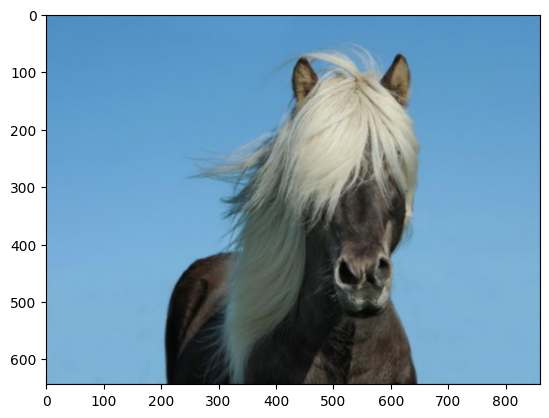

1/1 [==============================] - 0s 26ms/step
[[0.]]
모델 출력 :  0.0
./image/test_image_3.jpg는 말입니다.


In [52]:
# 잘 예측하는지 확인
for n in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(n))
    plt.show()
    
    # 이미지 처리
    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
    
    # 클래스 예측
    classes = model.predict(x)
    print(classes)
    
    print('클래스(레이블) 출력 : ', classes[0][0])
    if classes[0][0] > 0.5:
        print(n + "는 사람입니다.")
    else:
        print(n + "는 말입니다.")
        
    print('=============================================')

## (2) image_dataset_from_directory 사용하기

- 기본 파라미터
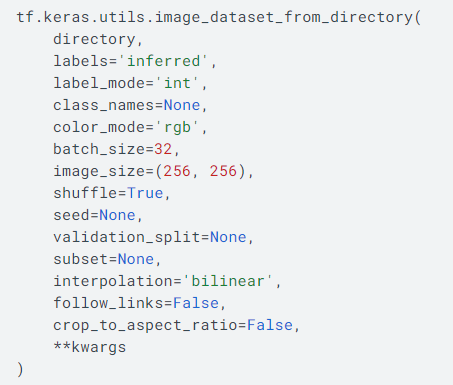

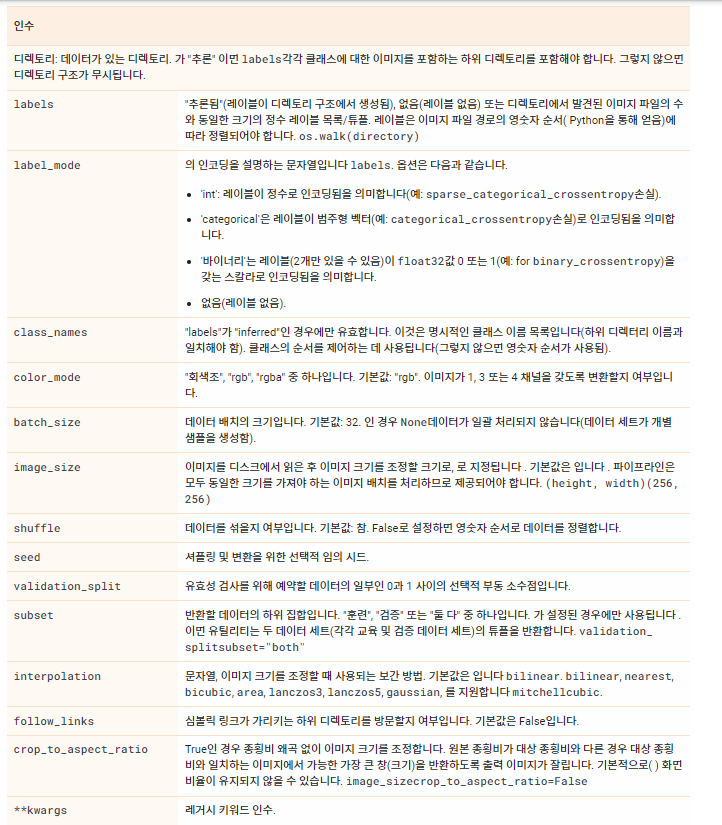

### image_dataset_from_directory() vs flow_from_directory()
- 포함 라이브러리가 다름
- tf.keras.utils.image_dataset_from_directory()
    - 디렉터리의 이미지 파일에서 tf.data.Dataset 생성  
    - 이미지에 대한 라벨링을 진행   
- ImageDataGenerator.flow_from_directory()
    - tensorflow.keras.preprocessing.image에 포함된 ImageDataGenerator
    - 디렉터리에 대한 경로를 가져오고 증강 데이터 배치 생성
    - 이미지 증식 가능  

In [ ]:
training_dir = 'horse-or-human/training/'

In [56]:
# image_dataset_from_directory() 사용해서 데이터셋 생성
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(100,100),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.


In [65]:
# 데이터 확인
for x_data, y_data in train_ds:
    print(x_data.shape)
    print(y_data.shape)
    print(x_data[0])
    print(y_data[:5])
    break

(32, 100, 100, 3)
(32, 1)
tf.Tensor(
[[[145. 168. 197.]
  [149. 172. 201.]
  [154. 176. 205.]
  ...
  [154. 205. 255.]
  [154. 206. 255.]
  [155. 205. 255.]]

 [[124. 148. 177.]
  [126. 150. 180.]
  [126. 148. 182.]
  ...
  [155. 206. 255.]
  [155. 207. 255.]
  [156. 206. 255.]]

 [[120. 142. 174.]
  [121. 142. 176.]
  [123. 146. 177.]
  ...
  [156. 209. 255.]
  [155. 208. 255.]
  [157. 208. 255.]]

 ...

 [[255. 222. 192.]
  [245. 213. 184.]
  [250. 218. 190.]
  ...
  [232. 200. 174.]
  [251. 217. 188.]
  [253. 217. 186.]]

 [[255. 226. 197.]
  [255. 223. 193.]
  [249. 218. 189.]
  ...
  [254. 221. 190.]
  [246. 212. 184.]
  [242. 208. 178.]]

 [[255. 226. 198.]
  [255. 228. 200.]
  [255. 236. 212.]
  ...
  [222. 191. 164.]
  [245. 211. 182.]
  [254. 222. 195.]]], shape=(100, 100, 3), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)


In [67]:
model2 = Sequential()

# 스케일되지 않은 데이터가 들어오는 경우 스케일링 처리하는 레이어 추가
model2.add(Rescaling(1/255, input_shape=(100, 100, 3)))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
# model2.add(Conv2D(32, (3,3), activation='relu'))
# model2.add(MaxPooling2D(2,2))
# model2.add(Conv2D(64, (3,3), activation='relu'))
# model2.add(MaxPooling2D(2,2))
# model2.add(Conv2D(64, (3,3), activation='relu'))
# model2.add(MaxPooling2D(2,2))
# model2.add(Conv2D(64, (3,3), activation='relu'))
# model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [68]:
# 검증 데이터 포함 학습
model2.fit(train_ds, 
           epochs=15,
           validation_data=val_generator)

Epoch 1/15
33/33 [==============================] - 4s 110ms/step - loss: 4.5469 - accuracy: 0.6504 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 4s 101ms/step - loss: 0.3982 - accuracy: 0.8832 - val_loss: 0.7693 - val_accuracy: 0.5000
Epoch 3/15
33/33 [==============================] - 4s 104ms/step - loss: 0.1836 - accuracy: 0.9445 - val_loss: 0.8434 - val_accuracy: 0.5000
Epoch 4/15
33/33 [==============================] - 4s 102ms/step - loss: 0.0385 - accuracy: 0.9932 - val_loss: 0.8495 - val_accuracy: 0.5000
Epoch 5/15
33/33 [==============================] - 4s 101ms/step - loss: 0.0272 - accuracy: 0.9932 - val_loss: 0.9435 - val_accuracy: 0.5000
Epoch 6/15
33/33 [==============================] - 4s 103ms/step - loss: 0.0914 - accuracy: 0.9708 - val_loss: 1.3068 - val_accuracy: 0.5000
Epoch 7/15
33/33 [==============================] - 4s 104ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 1.1077 - val_accuracy: 0.5000
Epoch 

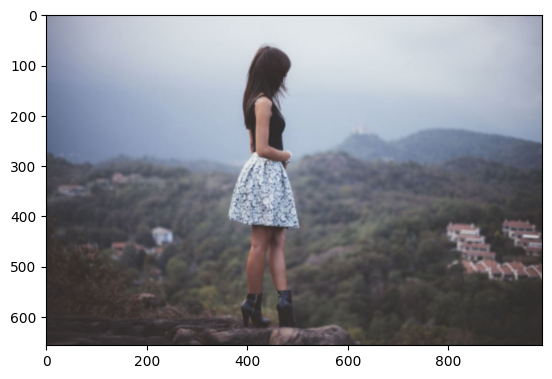

1/1 [==============================] - 0s 61ms/step
[[0.968581]]
클래스(레이블) 출력 :  0.968581
./image/test_image_1.jpg는 사람입니다.


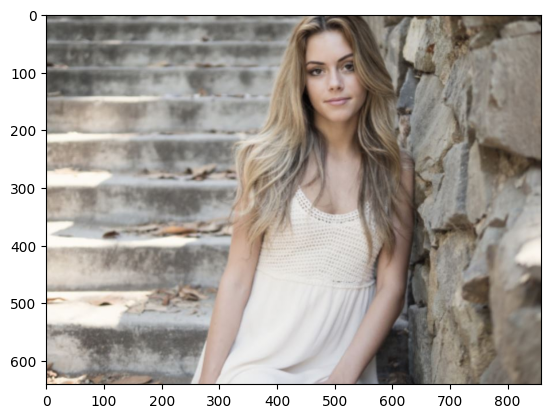

1/1 [==============================] - 0s 20ms/step
[[0.05219802]]
클래스(레이블) 출력 :  0.052198023
./image/test_image_2.jpg는 말입니다.


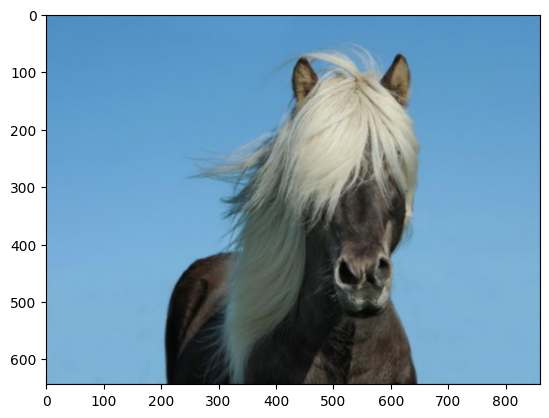

1/1 [==============================] - 0s 22ms/step
[[2.421117e-06]]
클래스(레이블) 출력 :  2.421117e-06
./image/test_image_3.jpg는 말입니다.


In [69]:
# 테스트 이미지로 예측 

# 잘 예측하는지 확인
for n in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(n))
    plt.show()
    
    # 이미지 처리
    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
    
    # 클래스 예측
    classes = model2.predict(x)
    print(classes)
    
    print('클래스(레이블) 예측 확률 출력 : ', classes[0][0])
    if classes[0][0] > 0.5:
        print(n + "는 사람입니다.")
    else:
        print(n + "는 말입니다.")
        
    print('=============================================')

## 이미지 증식

### 증강 vs 증식
- CNN모델의 성능을 높이고 과적합을 방지하는 가장 좋은 방법
    - 이미지 데이터 양을 늘리거나 이미지의 다양한 유형을 학습하게 하는 방법
- 이미지(데이터) 증식 : 원본이미지(원본데이터)를 이용해서 변형된 이미지(데이터) 개수를 늘리는 것
    - 학습이미지 수가 늘어나게 됨
    - 증식을 이용하려면 증강(변화)된 이미지를 저장해서 사용
- 이미지(데이터) 증강 : 학습이미지의 개수를 늘리는 것이 아니고 
    - 학습 시 마다 개별 원본이미지를 변형해서 학습을 진행하는 기법
    - 이미지 개수를 늘리지 않고도 여러 유형의 이미지를 학습할 수 있게 해주는 방법

In [71]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

### 이미지 증식
- 이미지 파일 새로 생성됨 
- 데이터 개수가 늘어남   

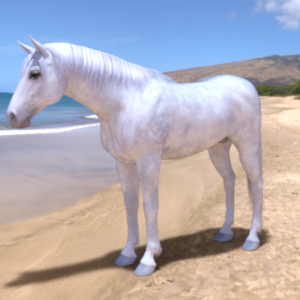

In [72]:
img = load_img(training_dir + '/horses/horse01-1.png')
img

In [73]:
aug_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=[0.8,2.0],
        horizontal_flip =True,
        vertical_flip=True,
        fill_mode='nearest'
)

# rescale
# horizontal_flip : 좌우반전
# vertical_flip : 상하반전
# rotation_range : 회전
# zoom_range : 확대 혹은 축소
# width_shift_range, height_shift_range : 이동
# shear_range : 눕히기
# brightness_range(min, max) : 밝기 조절
# channel_shift_range : RGB 픽셀 값을 변경

In [77]:
x = img_to_array(img) # 0~ 255
# x
x = x.reshape((1, ) + x.shape)
x.shape
# (1, 300, 300, 3)

(1, 300, 300, 3)

In [78]:
# 이미지 증식 : ImageDataGenerator 클ㄹ스의 flow() 사용
# flow() 사용 : 증식된 이미지 반환

# 증식된 이미지 저장 폴더 지정
add_img_path = './image'

# 이미지 증식
aug = aug_gen.flow(x, batch_size=1, 
                  save_to_dir=add_img_path,
                  save_prefix='horses',
                  save_format='png')
i = 0
for batch in aug:
    i += 1
    if i > 50:
        break
    

### 이미지 증강
- 실제 이미지 수를 늘리는것이 아니라
- 학습 시 원본 이미지 변형된 이미지로 학습 진행 

In [93]:
# 모델 생성

model3 = Sequential()

model3.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# 컴파일 
model3.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [94]:
## 이미지 증식은 학습데이터에 대해서만 진행
# 객체 생성
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [95]:
# 이미지 새로 생성하지 않고 학습 시에 이미지 변형해서 학습만 진행

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(100,100),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [96]:
model3.fit(train_generator, 
           epochs=15,
           validation_data=val_generator)

Epoch 1/15
33/33 [==============================] - 12s 329ms/step - loss: 0.6978 - accuracy: 0.5034 - val_loss: 0.6535 - val_accuracy: 0.6611
Epoch 2/15
33/33 [==============================] - 10s 320ms/step - loss: 0.6340 - accuracy: 0.6582 - val_loss: 0.6381 - val_accuracy: 0.6056
Epoch 3/15
33/33 [==============================] - 11s 321ms/step - loss: 0.5748 - accuracy: 0.6943 - val_loss: 0.4535 - val_accuracy: 0.8199
Epoch 4/15
33/33 [==============================] - 11s 322ms/step - loss: 0.4852 - accuracy: 0.7605 - val_loss: 0.3149 - val_accuracy: 0.9007
Epoch 5/15
33/33 [==============================] - 11s 325ms/step - loss: 0.4685 - accuracy: 0.7712 - val_loss: 0.3530 - val_accuracy: 0.8306
Epoch 6/15
33/33 [==============================] - 11s 326ms/step - loss: 0.3891 - accuracy: 0.8335 - val_loss: 0.1909 - val_accuracy: 0.9387
Epoch 7/15
33/33 [==============================] - 11s 323ms/step - loss: 0.3098 - accuracy: 0.8812 - val_loss: 0.0641 - val_accuracy: 0.9864

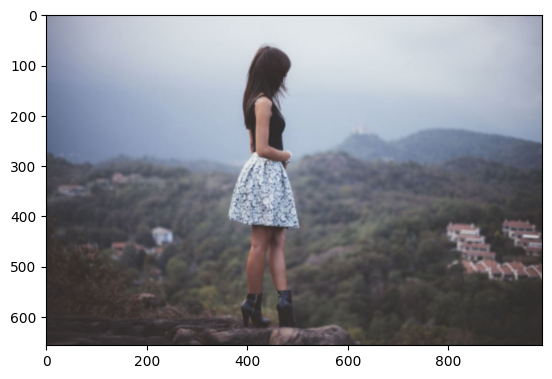

1/1 [==============================] - 0s 19ms/step
[[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_1.jpg는 사람입니다.


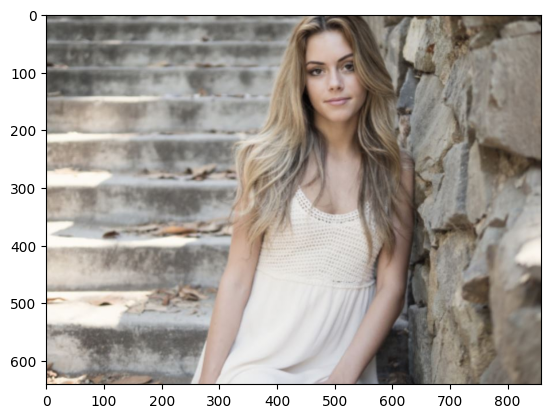

1/1 [==============================] - 0s 23ms/step
[[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_2.jpg는 사람입니다.


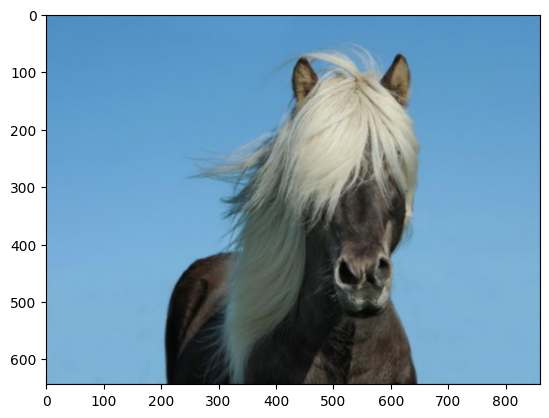

1/1 [==============================] - 0s 20ms/step
[[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_3.jpg는 사람입니다.


In [99]:
# 테스트 이미지로 예측 

# 잘 예측하는지 확인
for n in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(n))
    plt.show()
    
    # 이미지 처리
    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
    
    # 클래스 예측
    classes = model3.predict(x)
    print(classes)
    
    print('클래스(레이블) 출력 : ', classes[0][0])
    if classes[0][0] > 0.5:
        print(n + "는 사람입니다.")
    else:
        print(n + "는 말입니다.")
        
    print('=============================================')

### 이미지 변환 예제

In [88]:
# Anaconda Prompt의 deepEnv에서 설치 
# pip install opencv-python 
# pip install wget

In [101]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#이미지 다운로드
# 리눅스
# !wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
# 윈도우
import wget
url = "https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg"
wget.download(url)

100% [..............................................................................] 61745 / 61745

'033120_HT_covid-cat_feat-1028x579.jpg'

### OpenCV를 사용해서 이미지를 matplotlib으로 화면에 출력할 때 컬러 변환
- OpenCV : BGR
- matplotlib : RGB
-> BGR을 RGB로 변환 작업 필요 

In [109]:
image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),
                     cv2.COLOR_BGR2RGB) # BGR2RGB

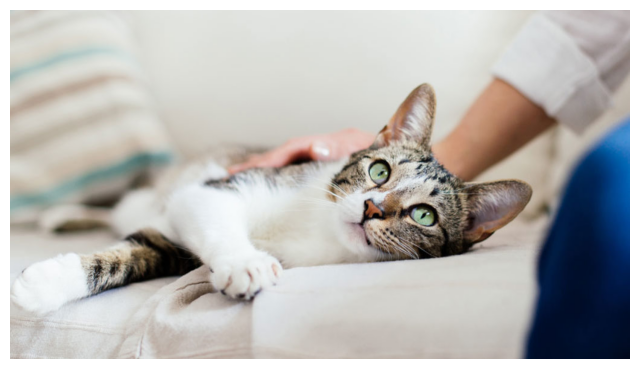

In [110]:
def show_image(image):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)